In [4]:
import os, shutil
original_data_dir='C:/Users/ysp/Desktop/Deep Learning/all_dogs_cats'
base_dir='C:/Users/ysp/Desktop/Deep Learning/dogs and cats_small1'# original_data_dir로부터 일부 데이터를 추출하여 base_dir에 저장하기 위해 만듬
os.mkdir(base_dir)
train_dir=os.path.join(base_dir,'train')#dog_cats_small폴더내에 train폴더 생성
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')#dog_cats_small폴더내에 validation폴더 생성
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')#dog_cats_small폴더내에 test폴더 생성
os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')#train폴더내에 cats폴더 생성
os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')#train폴더내에 dogs폴더 생성
os.mkdir(train_dogs_dir)
validation_cats_dir=os.path.join(validation_dir,'cats')#validation폴더내에 cats폴더 생성
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')#validation폴더내에 dogs폴더 생성
os.mkdir(validation_dogs_dir)
test_cats_dir=os.path.join(test_dir,'cats')#test폴더내에 cats폴더 생성
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')#test폴더내에 dogs폴더 생성
os.mkdir(test_dogs_dir)

In [5]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:     # original_dat_dir에 있는 1000개의 고양이 이미지를 train_cats_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:     # original_dat_dir에 있는 500개의 고양이 이미지를 validatio_cats_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:     # original_dat_dir에 있는 500개의 고양이 이미지를 test_cats_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:     # original_dat_dir에 있는 1000개의 개 이미지를 train_dogs_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:     # original_dat_dir에 있는 500개의 개 이미지를 validatio_dogs_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:     # original_dat_dir에 있는 500개의 개 이미지를 test_dogs_dir에 copy
    src=os.path.join(original_data_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

    
print(len(os.listdir(train_cats_dir)));print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)));print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)));print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255) 
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(directory=train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(directory=validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


In [8]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras import models
cat_dog_model=models.Sequential()
#train_generator에서 target_size=(150,150)으로 하였고 color_mode의 default는 'rgb'이므로 input_shape=(150,150,3)으로 지정함
cat_dog_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Conv2D(64,(3,3),activation='relu'))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Conv2D(128,(3,3),activation='relu'))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Flatten())
cat_dog_model.add(Dense(512,activation='relu'))
cat_dog_model.add(Dense(1,activation='sigmoid'))
cat_dog_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [9]:
from keras import optimizers
opt=optimizers.RMSprop(lr=1e-4)
cat_dog_model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['acc'])

In [10]:
cat_dog_result=cat_dog_model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 30s 298ms/step - loss: 0.7056 - acc: 0.5320 - val_loss: 0.7175 - val_acc: 0.5780
Epoch 2/10
100/100 [==============================] - 30s 296ms/step - loss: 0.6540 - acc: 0.6165 - val_loss: 0.6580 - val_acc: 0.6400
Epoch 3/10
100/100 [==============================] - 30s 297ms/step - loss: 0.5924 - acc: 0.7000 - val_loss: 0.5469 - val_acc: 0.6770
Epoch 4/10
100/100 [==============================] - 30s 299ms/step - loss: 0.5459 - acc: 0.7335 - val_loss: 0.6217 - val_acc: 0.6920
Epoch 5/10
100/100 [==============================] - 30s 302ms/step - loss: 0.4966 - acc: 0.7715 - val_loss: 0.7960 - val_acc: 0.6710
Epoch 6/10
100/100 [==============================] - 30s 297ms/step - loss: 0.4683 - acc: 0.7805 - val_loss: 0.4961 - val_acc: 0.6970
Epoch 7/10
100/100 [==============================] - 30s 297ms/step - loss: 0.4306 - acc: 0.8050 - val_loss: 0.5171 - val_acc: 0.6970
Epoch 8/10
100/100 [==============================] - 3

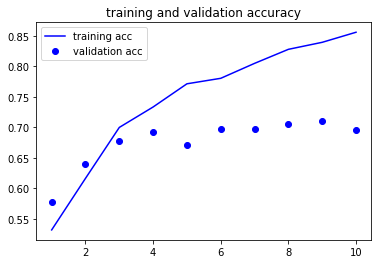

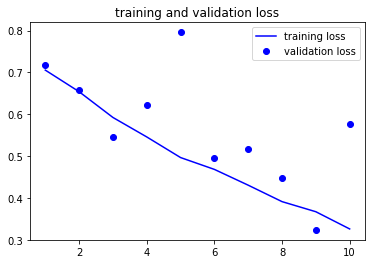

In [13]:
import matplotlib.pyplot as plt
acc=cat_dog_result.history['acc']
val_acc=cat_dog_result.history['val_acc']
loss=cat_dog_result.history['loss']
val_loss=cat_dog_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [20]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras import models
cat_dog_model1=models.Sequential()
#train_generator에서 target_size=(150,150)으로 하였고 color_mode의 default는 'rgb'이므로 input_shape=(150,150,3)으로 지정함
cat_dog_model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
cat_dog_model1.add(MaxPooling2D(2,2))
cat_dog_model1.add(Conv2D(64,(3,3),activation='relu'))
cat_dog_model1.add(MaxPooling2D(2,2))
cat_dog_model1.add(Conv2D(128,(3,3),activation='relu'))
cat_dog_model1.add(MaxPooling2D(2,2))
cat_dog_model1.add(Flatten())
cat_dog_model1.add(Dense(32,activation='relu'))
cat_dog_model1.add(Dense(1,activation='sigmoid'))


In [21]:
from keras import optimizers
opt=optimizers.RMSprop(lr=1e-4)
cat_dog_model1.compile(loss='binary_crossentropy', optimizer=opt,metrics=['acc'])

cat_dog_result1=cat_dog_model1.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 38s 379ms/step - loss: 0.6896 - acc: 0.5202 - val_loss: 0.6947 - val_acc: 0.5425
Epoch 2/10
100/100 [==============================] - 37s 373ms/step - loss: 0.6734 - acc: 0.5688 - val_loss: 0.6750 - val_acc: 0.5973
Epoch 3/10
100/100 [==============================] - 37s 369ms/step - loss: 0.6536 - acc: 0.6001 - val_loss: 0.6092 - val_acc: 0.6275
Epoch 4/10
100/100 [==============================] - 38s 383ms/step - loss: 0.6351 - acc: 0.6338 - val_loss: 0.6072 - val_acc: 0.6347
Epoch 5/10
100/100 [==============================] - 37s 368ms/step - loss: 0.6228 - acc: 0.6550 - val_loss: 0.5864 - val_acc: 0.6218
Epoch 6/10
100/100 [==============================] - 39s 392ms/step - loss: 0.6041 - acc: 0.6731 - val_loss: 0.5712 - val_acc: 0.6546
Epoch 7/10
100/100 [==============================] - 37s 373ms/step - loss: 0.5979 - acc: 0.6758 - val_loss: 0.6136 - val_acc: 0.6358
Epoch 8/10
100/100 [==============================] - 3

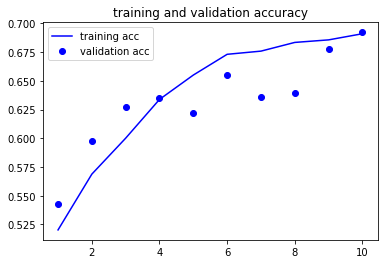

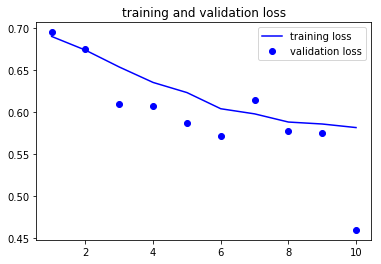

In [22]:
import matplotlib.pyplot as plt
acc=cat_dog_result1.history['acc']
val_acc=cat_dog_result1.history['val_acc']
loss=cat_dog_result1.history['loss']
val_loss=cat_dog_result1.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40, width_shift_range=0.2,
                               height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                              batch_size=32, class_mode='binary')
validation_generator=train_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                              batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout
from keras import models
aug_model=models.Sequential()
aug_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Conv2D(64,(3,3),activation='relu'))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Conv2D(128,(3,3),activation='relu'))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Flatten())
aug_model.add(Dropout(0.5))
aug_model.add(Dense(512,activation='relu'))
aug_model.add(Dense(1,activation='sigmoid'))
aug_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36992)            

In [34]:
from keras import optimizers
aug_model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
aug_result=cat_dog_model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=31)

Epoch 1/10
100/100 [==============================] - 40s 398ms/step - loss: 0.3934 - acc: 0.8251 - val_loss: 0.4480 - val_acc: 0.7762
Epoch 2/10
100/100 [==============================] - 41s 406ms/step - loss: 0.3969 - acc: 0.8176 - val_loss: 1.0067 - val_acc: 0.7428
Epoch 3/10
100/100 [==============================] - 40s 403ms/step - loss: 0.3996 - acc: 0.8144 - val_loss: 0.4424 - val_acc: 0.7448
Epoch 4/10
100/100 [==============================] - 40s 404ms/step - loss: 0.3955 - acc: 0.8163 - val_loss: 0.5444 - val_acc: 0.7448
Epoch 5/10
100/100 [==============================] - 40s 403ms/step - loss: 0.3879 - acc: 0.8147 - val_loss: 0.4324 - val_acc: 0.7407
Epoch 6/10
100/100 [==============================] - 41s 408ms/step - loss: 0.3896 - acc: 0.8185 - val_loss: 0.8110 - val_acc: 0.7521
Epoch 7/10
100/100 [==============================] - 40s 400ms/step - loss: 0.3922 - acc: 0.8271 - val_loss: 0.4573 - val_acc: 0.7314
Epoch 8/10
100/100 [==============================] - 4

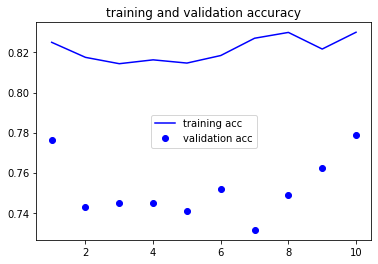

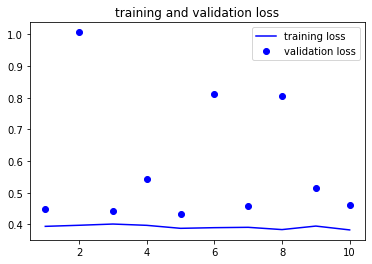

In [39]:
import matplotlib.pyplot as plt
acc=aug_result.history['acc']
val_acc=aug_result.history['val_acc']
loss=aug_result.history['loss']
val_loss=aug_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()